In [1]:
cd ..

/home/tommy/Scrivania/Polimi/Honours Programme/SCFR


In [2]:
from os import listdir
import json
import matplotlib.pyplot as plt

In [3]:
def parameters_to_string(par):
    if(par['game'] == 'kuhn'):
        return 'kuhn_' + str(par['players']) + '_' + str(par['rank'])
    if(par['game'] == 'leduc'):
        return 'leduc_' + str(par['players']) + '_' + str(par['suits']) + '_' + str(par['rank'])
    if(par['game'] == 'goofspiel'):
        return 'goofspiel_' + str(par['players']) + '_' + str(par['rank'])

In [4]:
# TODO: check it, in particular for bigger versions of goofspiel
# TODO: implement different goofspiel TieSolver

def delta_utility(game, players, rank, betting_parameters = [2, 4]):
    if game == 'kuhn':
        return 2 * players
    if game == 'leduc':
        return players + players * betting_parameters[0] + players * betting_parameters[1]
    if game == 'goofspiel':
        return sum(list(range(1, rank+1)))

In [5]:
target_directory = "results/remote/kuhn_20190118/"

In [6]:
file_names = listdir(target_directory)

In [7]:
def analyze(name, target_epsilons, time_to_target_per_instance):
    file = open(target_directory + name, "r")
    data = json.load(file)
    
    print("File = " + name)
    print("Game = " + parameters_to_string(data['parameters']))

    if 'total_duration' in data:
        running_time = data['total_duration']
        print("Solved in " + str(running_time) + " seconds")
        print("Solved in " + str(running_time / 60) + " minutes")
        print("Solved in " + str(running_time / 3600) + " hours")

    if 'total_duration' in data:
        print("Average iterations per second = " + str(data['average_iterations_per_second']))
    
    du = delta_utility(data['parameters']['game'], data['parameters']['players'], data['parameters']['rank'],
                   data['parameters']['betting_parameters'])

    iteration_counts = list(map(lambda el: el['iteration_number'], data['data']))
    epsilons = list(map(lambda el: max(0, -min(el['epsilon'])), data['data']))
    percent_epsilons = list(map(lambda el: el / du, epsilons))
    absolute_joint_sizes = list(map(lambda el: el['absolute_joint_size'], data['data']))
    relative_joint_sizes = list(map(lambda el: el['relative_joint_size'], data['data']))
    max_plan_frequencies = list(map(lambda el: el['max_plan_frequency'], data['data']))
    joint_support_sizes = list(map(lambda el: el['joint_support_size'], data['data']))
    durations = list(map(lambda el: el['duration'], data['data']))
    
    plt.plot(iteration_counts, epsilons)
    plt.show()
    plt.plot(iteration_counts, percent_epsilons)
    plt.show()
    
    time_to_target = []
    
    for t in target_epsilons:
        indices_below_t = [i for i in range(len(epsilons)) if percent_epsilons[i] <= t]
        if len(indices_below_t) > 0:
            time_to_t = sum(durations[:indices_below_t[0]+1])
        else:
            time_to_t = -1
        time_to_target.append(round(time_to_t, 5))
        
    time_to_target_per_instance[parameters_to_string(data['parameters'])] = time_to_target

File = 1547765047_2_5
Game = kuhn_2_5
Solved in 2367.4190587997437 seconds
Solved in 39.45698431332906 minutes
Solved in 0.657616405222151 hours
Average iterations per second = 422.40092487343134


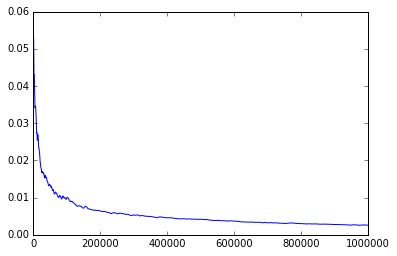

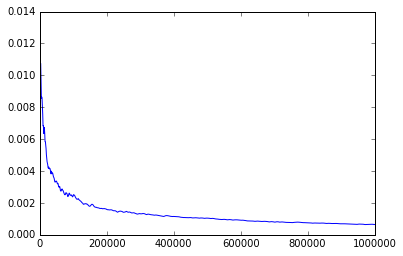

File = 1547765096_3_7
Game = kuhn_3_7


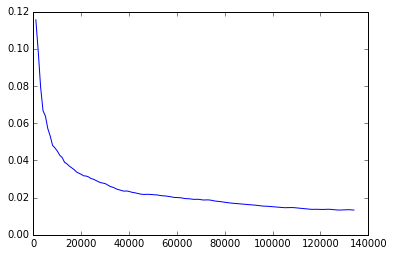

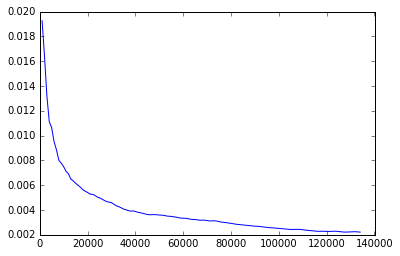

File = 1547765073_3_4
Game = kuhn_3_4
Solved in 20566.08086180687 seconds
Solved in 342.76801436344783 minutes
Solved in 5.7128002393907975 hours
Average iterations per second = 48.62375124942221


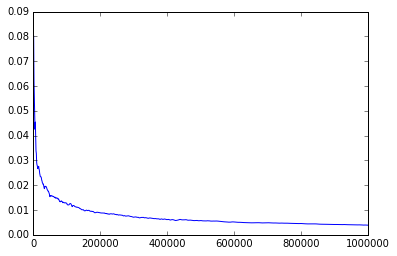

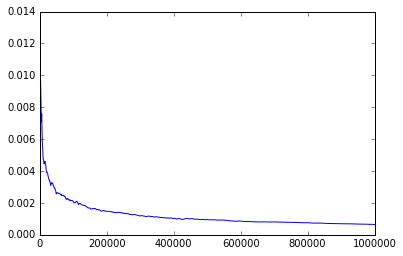

File = 1547765090_3_6
Game = kuhn_3_6


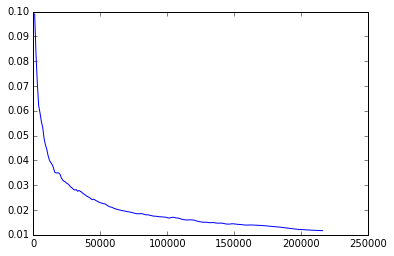

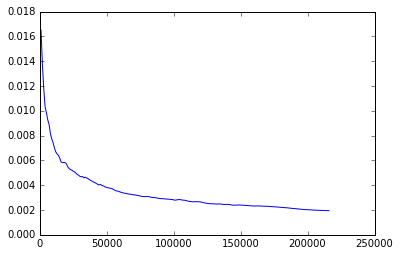

File = 1547765069_3_3
Game = kuhn_3_3
Solved in 1084.5020883083344 seconds
Solved in 18.075034805138905 minutes
Solved in 0.3012505800856484 hours
Average iterations per second = 922.0821340785565


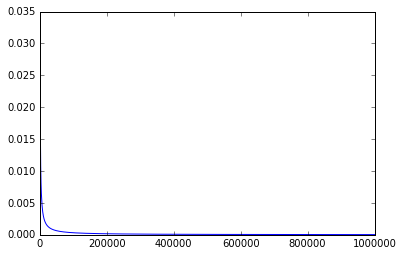

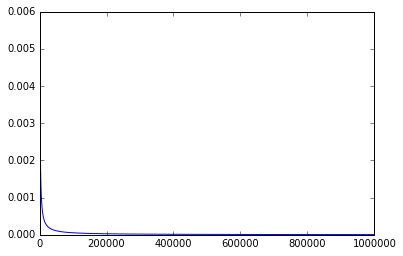

File = 1547765102_3_8
Game = kuhn_3_8


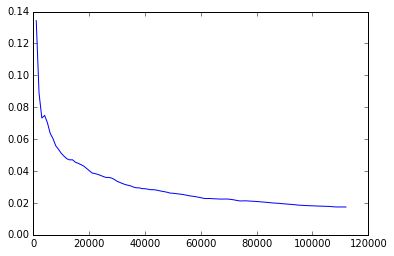

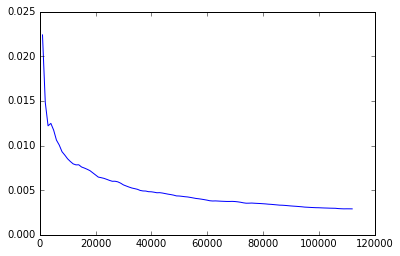

File = 1547765039_2_3
Game = kuhn_2_3
Solved in 340.43761134147644 seconds
Solved in 5.673960189024608 minutes
Solved in 0.09456600315041012 hours
Average iterations per second = 2937.3957714588373


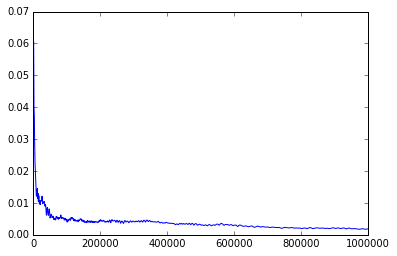

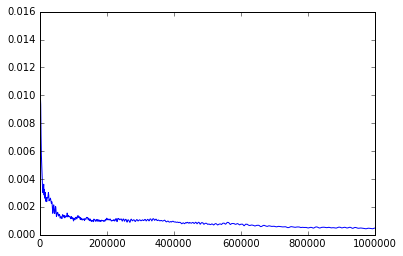

File = 1547765059_2_8
Game = kuhn_2_8
Solved in 34781.04827070236 seconds
Solved in 579.6841378450393 minutes
Solved in 9.661402297417323 hours
Average iterations per second = 28.75128984661296


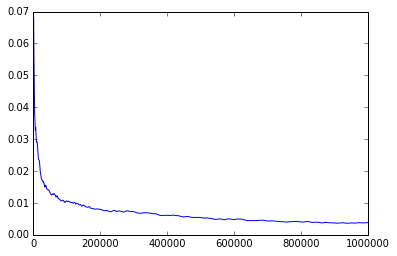

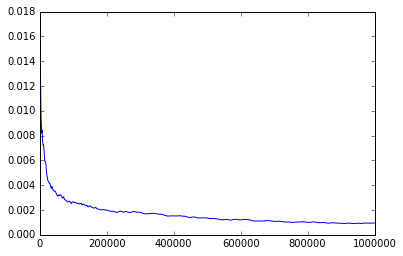

File = 1547765034_2_2
Game = kuhn_2_2
Solved in 313.11161828041077 seconds
Solved in 5.21852697134018 minutes
Solved in 0.08697544952233632 hours
Average iterations per second = 3193.749262617391


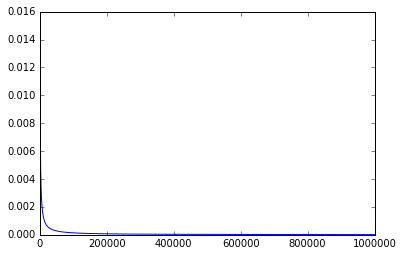

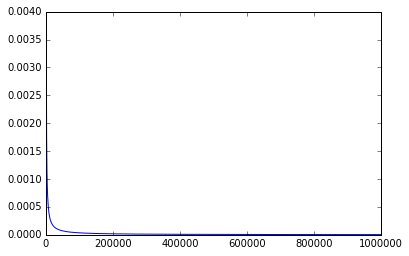

File = 1547765055_2_7
Game = kuhn_2_7
Solved in 14208.22378563881 seconds
Solved in 236.80372976064683 minutes
Solved in 3.9467288293441136 hours
Average iterations per second = 70.38177432218981


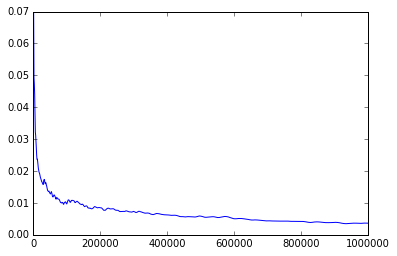

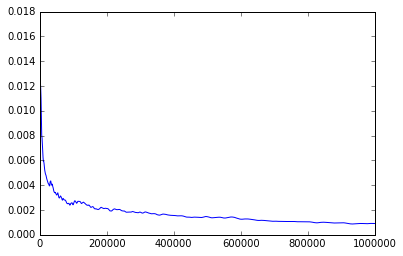

File = 1547765085_3_5
Game = kuhn_3_5


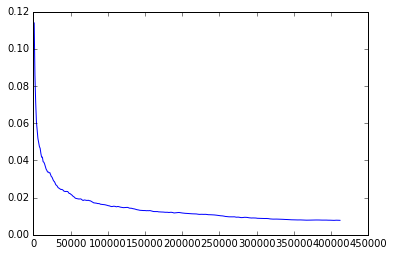

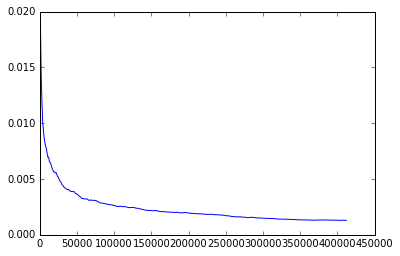

File = 1547765043_2_4
Game = kuhn_2_4
Solved in 886.3494250774384 seconds
Solved in 14.772490417957306 minutes
Solved in 0.24620817363262176 hours
Average iterations per second = 1128.2232172854765


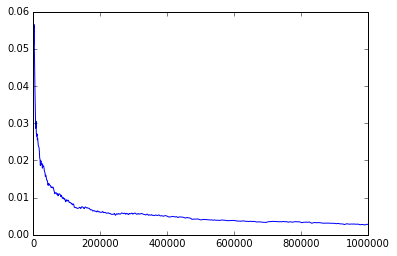

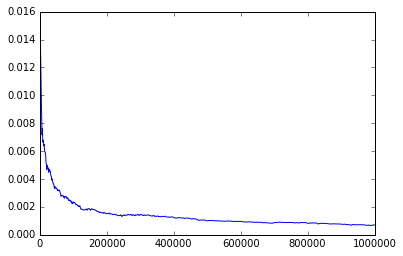

File = 1547765051_2_6
Game = kuhn_2_6
Solved in 6083.759353160858 seconds
Solved in 101.39598921934764 minutes
Solved in 1.689933153655794 hours
Average iterations per second = 164.3720505612115


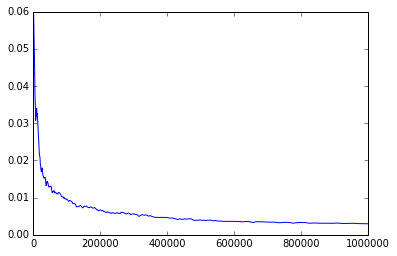

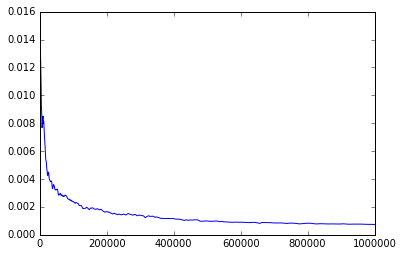

In [8]:
target_epsilons = [10, 5, 2, 1.5, 1, 0.5, 0.2, 0.1, 0.01, 0]
time_to_target_per_instance = {}

for name in file_names:
    analyze(name, target_epsilons, time_to_target_per_instance)

In [9]:
table_text = [['Targets'] + (list(map(str, target_epsilons)))]
for (game, times) in sorted(time_to_target_per_instance.items()):
    line_text = [game] + list(map(lambda t: 'n/a' if t == -1 else str(t), times))
    table_text.append(line_text)

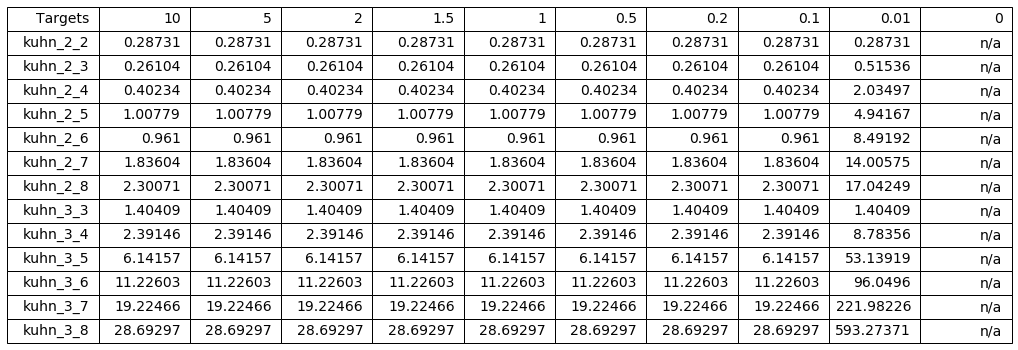

In [13]:
ax = plt.subplot(frame_on = False)

# Hide axes
ax.xaxis.set_visible(False) 
ax.yaxis.set_visible(False)

table = plt.table(cellText = table_text, loc = 'center')
table.scale(3, 2)
table.set_fontsize(45)